Online Retail Project

1. Using the data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.

2. Segment the customers based on their purchasing behavior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import numpy as np

In [2]:


# Try UTF-8 encoding
try:
    df = pd.read_csv("OnlineRetail.csv", encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try Latin-1 encoding
    df = pd.read_csv("OnlineRetail.csv", encoding='latin-1')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# change invoice no to int, invoice Date to Date.
# Replace NAN in customer ID to some ID based on different invoice no. So same invoice no will have same customer id.
# which customer id is purchasing most quantities. Followed by pattern of item description that customer is purchasing.
# which customer is purchasing least quantities and why
# which items are purchased most in terms of quantity through which retailers can focus more on those product marketing and selling.
# explore the purchasing quantity based on country. Try to find pattern if there is product purchasing changing country wise.
# Look into the items which are purchased most. Are they dependent on the unit price?
# which time period has most purchase. is there a pattern?
# Segment the customers based on their purchasing behavior. Segmentation can be done based on country, freq of purchase(last month, the last quarter, or the last year.)
# repeated purchases can be one of the purchase behavior

In [6]:
# Convert InvoiceDate data type to Datetime.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [7]:
# Assuming your DataFrame is named df
null_description = df[df['Description'].isnull()]
null_customer_id = df[df['CustomerID'].isnull()]
null_description 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [8]:
null_customer_id

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [9]:
# Get unique InvoiceNo values
unique_invoices = df['InvoiceNo'].unique()

# Create a dictionary to store the mapping of InvoiceNo to CustomerID
invoice_customer_map = {}

# Assign a unique CustomerID to each InvoiceNo
for idx, invoice in enumerate(unique_invoices):
    # Skip NaN CustomerID values
    if pd.isnull(invoice_customer_map.get(invoice)):
        invoice_customer_map[invoice] = 100000 + idx

# Fill NaN values in CustomerID based on InvoiceNo
df['CustomerID'] = df.apply(lambda row: invoice_customer_map.get(row['InvoiceNo']) if pd.isnull(row['CustomerID']) else row['CustomerID'], axis=1)

# Convert CustomerID to integer dtype
df['CustomerID'] = df['CustomerID'].astype(int)

# Display the updated DataFrame
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [21]:
invoice_customer_map.get(invoice)

125899

In [11]:
# Drop rows with missing values in the "Description" column
df = df.dropna(subset=['Description'])

# Reset index after dropping rows
df = df.reset_index(drop=True)


Although the null values from Description column is removed. However, still there are many cases where values is ?, Missing, ???, etc in the column. Not removing these as they are not affecting the analysis. It's just means that the Description for these stockcode is missing. But their stockcode are available. Thus, not removing those rows.

In [12]:
# Create a new column of Total Expenditure

df['TotalExpenditure'] = df['UnitPrice']*df['Quantity']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


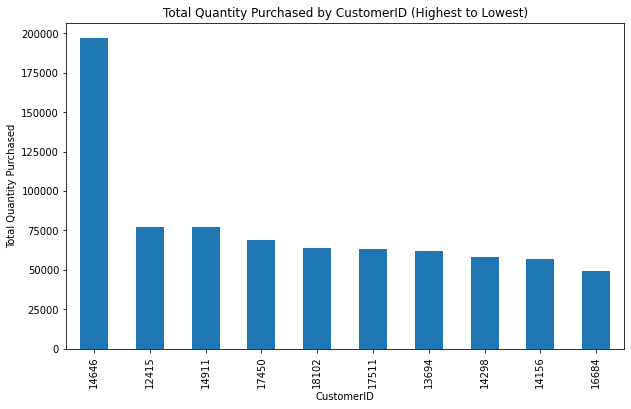

In [14]:
# Group by CustomerID and sum the Quantity for each group
# Top 10 customers based on quantities of product purchased.

customer_quantities = df.groupby('CustomerID')['Quantity'].sum()

# Sort the customer_quantities Series from highest to lowest
customer_quantities_sorted = customer_quantities.sort_values(ascending=False).head(10)

# Plot the graph
plt.figure(figsize=(10, 6))
customer_quantities_sorted.plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity Purchased')
plt.title('Total Quantity Purchased by CustomerID (Highest to Lowest)')
plt.show()


CustomerID 14646 looks the most promising customer. Spent the highest on products. However, it also looks like a outlier. Let's dig deeper into this customer id.

In [15]:
customer_14646 = df[df['CustomerID'] == 14646]

In [16]:
customer_14646

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
37835,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37836,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37837,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90
37838,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646,Netherlands,1.95
37839,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646,Netherlands,1.70
...,...,...,...,...,...,...,...,...,...
533509,581176,22908,PACK OF 20 NAPKINS RED APPLES,96,2011-12-07 15:19:00,0.72,14646,Netherlands,69.12
533510,581176,22907,PACK OF 20 NAPKINS PANTRY DESIGN,96,2011-12-07 15:19:00,0.72,14646,Netherlands,69.12
533511,581176,22029,SPACEBOY BIRTHDAY CARD,72,2011-12-07 15:19:00,0.36,14646,Netherlands,25.92
533512,581176,22712,CARD DOLLY GIRL,72,2011-12-07 15:19:00,0.36,14646,Netherlands,25.92


<ipython-input-17-b38c6caaec24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_14646['Year'] = customer_14646['InvoiceDate'].dt.year


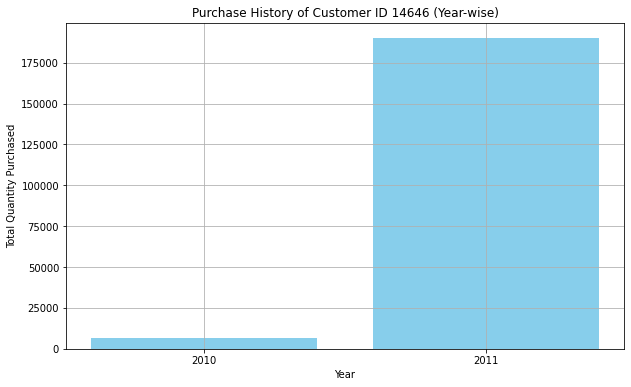

In [17]:
customer_14646['Year'] = customer_14646['InvoiceDate'].dt.year

# Group by year and sum the quantities purchased
purchase_history = customer_14646.groupby('Year')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(purchase_history['Year'], purchase_history['Quantity'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Quantity Purchased')
plt.title('Purchase History of Customer ID 14646 (Year-wise)')
plt.xticks(purchase_history['Year'])
plt.grid(True)
plt.show()

<ipython-input-18-7f194757db68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_14646['Year'] = customer_14646['InvoiceDate'].dt.year
<ipython-input-18-7f194757db68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_14646['Month'] = customer_14646['InvoiceDate'].dt.month


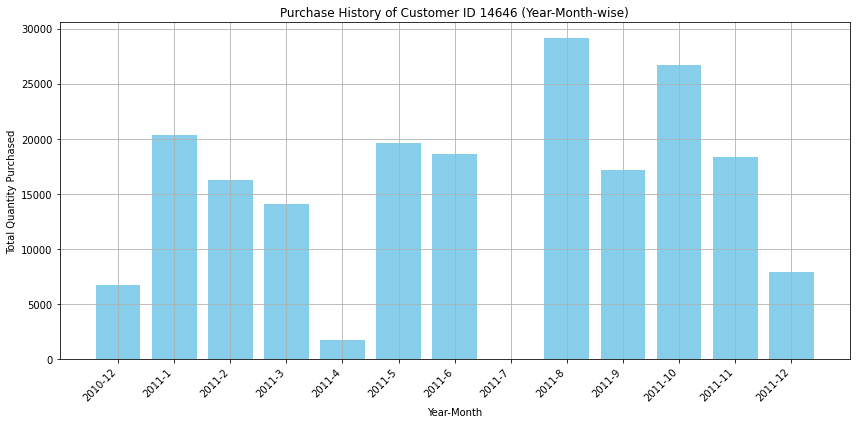

In [18]:
customer_14646['Year'] = customer_14646['InvoiceDate'].dt.year
customer_14646['Month'] = customer_14646['InvoiceDate'].dt.month

# Group by year and month, and sum the quantities purchased
purchase_history = customer_14646.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Combine year and month into a single string format for x-axis labels
purchase_history['YearMonth'] = purchase_history['Year'].astype(str) + '-' + purchase_history['Month'].astype(str)

# Plot the purchase history using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(purchase_history.index, purchase_history['Quantity'], color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Purchased')
plt.title('Purchase History of Customer ID 14646 (Year-Month-wise)')
plt.xticks(purchase_history.index, purchase_history['YearMonth'], rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

With so much of purchase quantities of products, it looks like the customer might be running his/her own business. It is just an assumption. But this customer spent the most and looks to important from the perspective of online retailer.

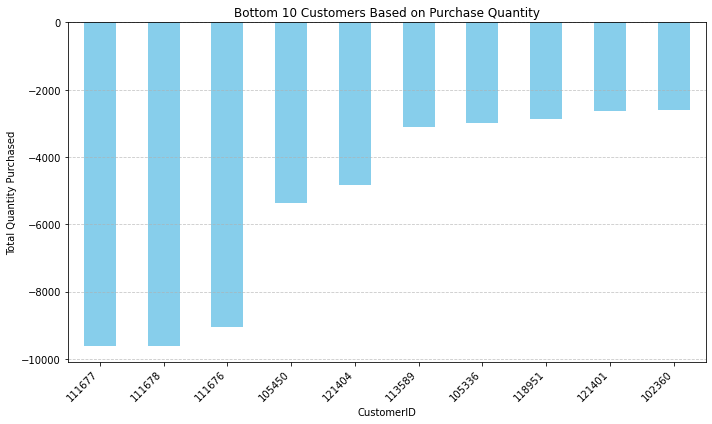

In [19]:
# Bottom 10 customers based on quantities of product purchased.

# Group by CustomerID and sum the quantities purchased for each customer
customer_purchase_quantities = df.groupby('CustomerID')['Quantity'].sum()

# Sort the customer_purchase_quantities Series in ascending order and select the bottom 10
bottom_10_customers = customer_purchase_quantities.sort_values().head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bottom_10_customers.plot(kind='bar', color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity Purchased')
plt.title('Bottom 10 Customers Based on Purchase Quantity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The total quantity purchased is in negative. This could be due to return or refund, data entry error, cancellation of order, or missing data. I am assuming that there is return or refund or cancellation of order that leads to negative total quantity purchased. Here we need to further analyse the data why these customers are returning the products.

<ipython-input-20-427b7ac9dca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_111677['Year'] = customer_111677['InvoiceDate'].dt.year
<ipython-input-20-427b7ac9dca0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_111677['Month'] = customer_111677['InvoiceDate'].dt.month


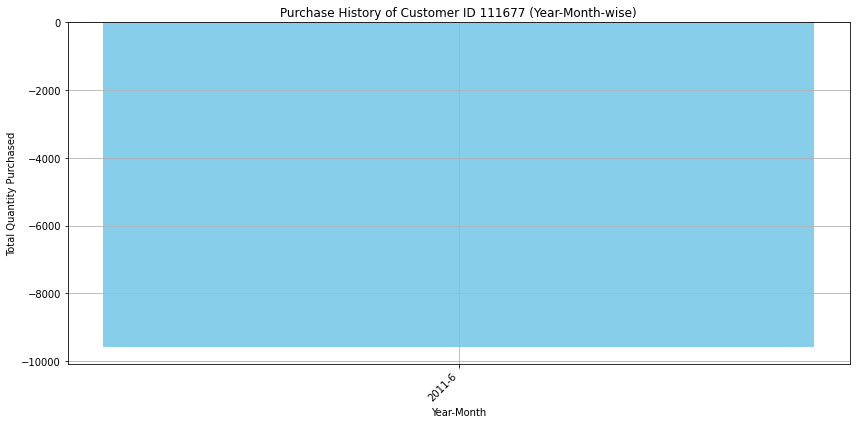

In [20]:
customer_111677 = df[df['CustomerID'] == 111677]

customer_111677['Year'] = customer_111677['InvoiceDate'].dt.year
customer_111677['Month'] = customer_111677['InvoiceDate'].dt.month

# Group by year and month, and sum the quantities purchased
purchase_history = customer_111677.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Combine year and month into a single string format for x-axis labels
purchase_history['YearMonth'] = purchase_history['Year'].astype(str) + '-' + purchase_history['Month'].astype(str)

# Plot the purchase history using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(purchase_history.index, purchase_history['Quantity'], color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Purchased')
plt.title('Purchase History of Customer ID 111677 (Year-Month-wise)')
plt.xticks(purchase_history.index, purchase_history['YearMonth'], rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

This is weird all the negative purchase history is in the month of June,2011.

In [21]:
# Group by day and sum the quantities purchased
purchase_history_daywise = customer_111677.groupby(customer_111677['InvoiceDate'].dt.date)['Quantity'].sum()
print(purchase_history_daywise)

InvoiceDate
2011-06-14   -9600
Name: Quantity, dtype: int64


Return or cancellation is doen on a single day from customer 111677.

In [22]:


# Split the data into positive and negative quantities
positive_quantities = customer_111677[customer_111677['Quantity'] > 0]
negative_quantities = customer_111677[customer_111677['Quantity'] < 0]

# Display the positive and negative quantities
print("Positive Quantities:")
positive_quantities

print("\nNegative Quantities:")
negative_quantities

Positive Quantities:

Negative Quantities:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure,Year,Month
224664,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,111677,United Kingdom,-0.0,2011,6


From the provided record for customer ID 111677:

The customer has a significant negative quantity, indicating a large return of 9600 units of the product with StockCode 23005 ("printing smudges/thrown away") on June 14, 2011.
The UnitPrice for this item is 0.0, which might suggest that this item was returned due to defects or damage.
The negative quantity might indicate that the customer was dissatisfied with the product or received a defective item, leading to a return.
Whether this record is correct or not depends on the specific context of the business and the details of the transaction. To assess the correctness of this record, the online retailer can consider the following:

Verification: Check if this transaction matches the customer's history and behavior. Review other transactions made by this customer to see if there are any patterns or anomalies.

Documentation: Refer to any documentation or records related to this transaction, such as invoices, receipts, or customer complaints, to verify the details of the return.

Communication: Reach out to the customer to confirm the return and understand the reason behind it. This can provide valuable insights into customer satisfaction and product quality.



In [23]:
# Customers with negative quantity data

def extract_negative_quantity_customers(df):
    # Group by CustomerID and sum the quantities purchased for each customer
    customer_purchase_quantities = df.groupby('CustomerID')['Quantity'].sum()

    # Filter customers with negative total quantity purchased
    negative_quantity_customers = customer_purchase_quantities[customer_purchase_quantities < 0]

    # Extract rows for customers with negative total quantity purchased
    negative_quantity_rows = df[df['CustomerID'].isin(negative_quantity_customers.index)]

    return negative_quantity_rows

# Call the function to extract rows for customers with negative total quantity purchased
negative_quantity_df = extract_negative_quantity_customers(df)

# Display the extracted DataFrame
print("DataFrame for customers with negative total quantity purchased:")
negative_quantity_df


DataFrame for customers with negative total quantity purchased:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40
...,...,...,...,...,...,...,...,...,...
533881,581210,23395,check,-26,2011-12-07 18:36:00,0.00,125702,United Kingdom,-0.00
533883,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,125704,United Kingdom,-0.00
533884,581213,22576,check,-30,2011-12-07 18:38:00,0.00,125705,United Kingdom,-0.00
535456,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,125718,United Kingdom,-0.00


Return Analysis: The negative quantities indicate that these customers have returned more items than they purchased. Analyzing the returned products can provide insights into customer behavior, product quality issues, or mismatches between customer expectations and product descriptions.

Product Analysis: Examining the descriptions and stock codes of the returned items can help identify trends in returned products. It may reveal patterns such as specific products that are frequently returned or product categories that have a higher return rate.

Customer Satisfaction: Customers returning products may indicate dissatisfaction with the purchased items. Analyzing the reasons for returns and customer feedback can help improve product quality, customer service, and overall satisfaction.

Order Fulfillment: Negative quantities might also indicate issues with order fulfillment, such as incorrect items shipped, damaged goods, or errors in processing orders. Addressing these issues can improve the overall customer experience and reduce returns.

Loss Prevention: Large negative quantities, such as those with significant quantities returned, may indicate potential loss for the business. Identifying the root causes of returns and implementing strategies to minimize returns can help mitigate losses and improve profitability.

Customer Segmentation: Segmenting customers based on their return behavior can help tailor marketing strategies, product offerings, and customer service approaches. Understanding the characteristics of customers with high return rates can inform targeted retention efforts.

In [24]:
# Product Analysis

def get_returned_product_data(df):
    # Filter rows where Quantity is negative (indicating returned items)
    returned_items = df[df['Quantity'] < 0]

    # Extract StockCode and Description columns
    product_data = returned_items[['StockCode', 'Description', 'Quantity']]

    # Remove duplicate rows to create a DataFrame with unique StockCode-Description pairs
    product_data = product_data.drop_duplicates()

    return product_data

# Call the function with your DataFrame
returned_products = get_returned_product_data(df)


In [25]:
returned_products

,StockCode,Description,Quantity
141,D,Discount,-1
154,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
...,...,...,...
538629,23660,HENRIETTA HEN MUG,-2
538631,21876,POTTERING MUG,-4
538968,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995
538995,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11


In [26]:
def top_returned_products(df, n=20):
    # Filter rows where Quantity is negative (indicating returned items)
    returned_items = df[df['Quantity'] < 0]

    # Group by StockCode and Description, and sum the quantities returned for each product
    returned_product_totals = returned_items.groupby(['StockCode', 'Description'])['Quantity'].sum()

    # Sort the products by the total quantity returned in ascending order
    top_returned_products = returned_product_totals.sort_values(ascending=True).head(n)

    return top_returned_products

# Call the function with your DataFrame
top_10_returned_products = top_returned_products(df)

print("Top 10 returned products based on most negative quantity:")
print(top_10_returned_products)


Top 10 returned products based on most negative quantity:
StockCode  Description                        
23843      PAPER CRAFT , LITTLE BIRDIE           -80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        -74494
23005      printing smudges/thrown away          -19200
84347      ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
23003      Printing smudges/thrown away           -9058
72140F     throw away                             -5368
79323W     Unsaleable, destroyed.                 -4830
M          Manual                                 -4066
21108      FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
20713      wrongly marked. 23343 in box           -3100
84598      check                                  -3000
23270      incorrect stock entry.                 -2880
79323LP    Unsaleable, destroyed.                 -2618
20971      PINK BLUE FELT CRAFT TRINKET BOX       -2617
22617      mouldy, thrown away.                   -2600
85123A     WHITE HANGING HEART T-LIGHT HOLDER     -2578

# Observations

Significant Negative Quantities: The top returned products have extremely high negative quantities, indicating a substantial number of returns for these items. This suggests potential issues such as product defects, customer dissatisfaction, or mismatches between customer expectations and product descriptions.

Product Categories: Analyzing the descriptions of the returned products reveals various categories, including paper craft, ceramic storage jars, candle holders, flannels, and manuals. This diversity in product categories indicates that returns can occur across different types of merchandise, and addressing the underlying issues may require a multifaceted approach.

Quality Control Issues: Products labeled as "printing smudges/thrown away" and "unsaleable, destroyed" suggest potential quality control issues or damage during transit. Identifying and addressing these issues can help improve product quality and reduce returns.

Inventory Management: Items labeled as "throw away" and "wrongly marked" indicate potential errors in inventory management, such as mislabeling or misidentification of products. Implementing robust inventory management practices can help prevent such errors and minimize returns.

Customer Communication: The presence of items labeled as "rotating silver angels T-light holder" and "medium ceramic top storage jar" suggests that clear communication with customers regarding product features, dimensions, and specifications is essential to reduce returns resulting from misunderstandings or discrepancies.

In [27]:
# Function to create DataFrame of transactions made by top customers with negative quantities purchased

def transactions_by_top_customers(df, n=10):
    # Group by CustomerID and sum the quantities purchased for each customer
    customer_purchase_quantities = df.groupby('CustomerID')['Quantity'].sum()

    # Sort customers by the total quantity purchased in ascending order (since negative values indicate returns)
    top_customers = customer_purchase_quantities.sort_values(ascending=True).head(n)

    # Filter rows where Quantity is negative (indicating returns)
    negative_quantity_transactions = df[df['Quantity'] < 0]

    # Filter transactions made by the top customers
    transactions_by_top_customers = negative_quantity_transactions[negative_quantity_transactions['CustomerID'].isin(top_customers.index)]

    # Extract relevant columns
    relevant_columns = ['CustomerID', 'Description', 'Quantity', 'StockCode', 'UnitPrice', 'Country']
    transactions_by_top_customers = transactions_by_top_customers[relevant_columns]

    # Sort the DataFrame by Quantity in ascending order
    transactions_by_top_customers.sort_values(by='Quantity', ascending=True, inplace=True)

    return transactions_by_top_customers

# Call the function to create DataFrame of transactions by top 10 customers with negative quantities purchased
transactions_df = transactions_by_top_customers(df, n=10)

# Display the DataFrame
print("DataFrame of transactions made by top 10 customers with negative quantities purchased:")
transactions_df

DataFrame of transactions made by top 10 customers with negative quantities purchased:


,CustomerID,Description,Quantity,StockCode,UnitPrice,Country
224664,111677,printing smudges/thrown away,-9600,23005,0.0,United Kingdom
224665,111678,printing smudges/thrown away,-9600,23005,0.0,United Kingdom
224663,111676,Printing smudges/thrown away,-9058,23003,0.0,United Kingdom
115486,105450,throw away,-5368,72140F,0.0,United Kingdom
430017,121404,"Unsaleable, destroyed.",-4830,79323W,0.0,United Kingdom
262925,113589,wrongly marked. 23343 in box,-3100,20713,0.0,United Kingdom
113255,105336,check,-3000,84598,0.0,United Kingdom
374156,118951,incorrect stock entry.,-2880,23270,0.0,United Kingdom
430014,121401,"Unsaleable, destroyed.",-2618,79323LP,0.0,United Kingdom
50705,102360,"mouldy, thrown away.",-2600,22617,0.0,United Kingdom


# Insights

CustomerID 111677, 111678, and 111676: All three customers made purchases of "printing smudges/thrown away" items with a quantity of -9600, 9058, indicating significant returns of this product (StockCode 23005) at a unit price of 0.0, and they are both from the United Kingdom.

CustomerID 105450: Made a return of "throw away" items with a quantity of -5368 (StockCode 72140F), indicating a large number of items discarded, with a unit price of 0.0, and they are from the United Kingdom.

CustomerID 121404: Returned "Unsaleable, destroyed." items with a quantity of -4830 (StockCode 79323W), reflecting items that were deemed unsalable and destroyed, with a unit price of 0.0, and from the United Kingdom.

CustomerID 113589: Made a return of "wrongly marked. 23343 in box" items with a quantity of -3100 (StockCode 20713), indicating items that were wrongly marked, with a unit price of 0.0, and they are from the United Kingdom.

CustomerID 105336: Returned items labeled as "check" with a quantity of -3000 (StockCode 84598), with a unit price of 0.0, and from the United Kingdom.

CustomerID 118951: Returned items due to "incorrect stock entry." with a quantity of -2880 (StockCode 23270), indicating an error in stock entry, with a unit price of 0.0, and from the United Kingdom.

CustomerID 121401: Made a return of "Unsaleable, destroyed." items with a quantity of -2618 (StockCode 79323LP), indicating items that were deemed unsalable and destroyed, with a unit price of 0.0, and from the United Kingdom.

CustomerID 102360: Returned "mouldy, thrown away." items with a quantity of -2600 (StockCode 22617), reflecting items that were moldy and discarded, with a unit price of 0.0, and from the United Kingdom.

These insights provide information about the types of returns made by the top customers with the most negative quantities purchased, shedding light on potential issues such as damaged or incorrectly labeled products, unsaleable items, and errors in stock entry. Also, all the issues were from United Kingdom. However, we should also look into the data that maximum product purchase is from which country.

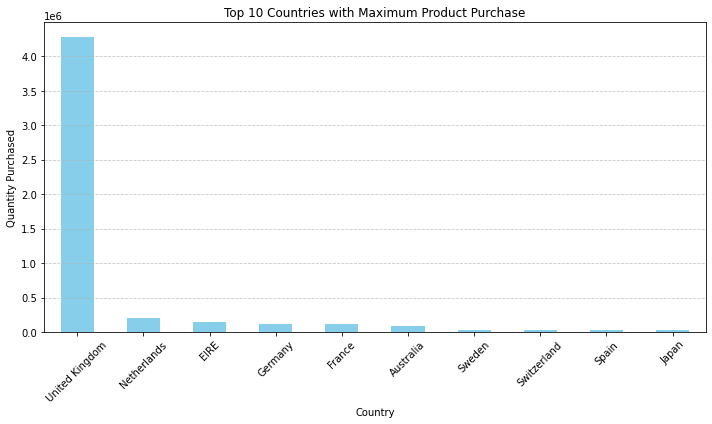

In [28]:


# Function to find top 10 countries with maximum product purchase based on quantities
def top_countries_by_product_purchase(df):
    # Group by Country and sum the quantities purchased for each country
    country_purchase_quantities = df.groupby('Country')['Quantity'].sum()

    # Sort countries by the total quantity purchased in descending order
    top_countries = country_purchase_quantities.sort_values(ascending=False).head(10)

    return top_countries

# Call the function to find top 10 countries with maximum product purchase based on quantities
top_countries = top_countries_by_product_purchase(df)

# Plot the graph
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Maximum Product Purchase')
plt.xlabel('Country')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Clearly the maximum purchase is from UK and the data is highly skewed in terms of country as most of the purchase is from UK. It is highly likely that most negative quantity will also be from UK.

In [29]:


# Function to find top 10 products sold with positive quantities for each country, with the United Kingdom as the first country
def top_products_by_country(df):
    # Filter rows with positive quantities
    positive_quantity_df = df[df['Quantity'] > 0]

    # Group by Country and StockCode, summing the quantities sold for each product in each country
    country_product_quantities = positive_quantity_df.groupby(['Country', 'StockCode'])['Quantity'].sum()

    # Sort the data first on country and then on quantity
    country_product_quantities = country_product_quantities.reset_index().sort_values(by=['Quantity', 'Country'], ascending=[False, False])

    # Filter top 10 countries
    top_10_countries = country_product_quantities['Country'].unique()[:10]

    # Extract top 10 countries data
    top_products_countrywise = country_product_quantities[country_product_quantities['Country'].isin(top_10_countries)]

    return top_products_countrywise

# Call the function to find top 10 products sold with positive quantities for each country
top_products_countrywise = top_products_by_country(df)

# Display the result
top_products_countrywise


,Country,StockCode,Quantity
17866,United Kingdom,23843,80995
17420,United Kingdom,23166,77036
16508,United Kingdom,22197,53343
18311,United Kingdom,84077,49526
18786,United Kingdom,85099B,44268
...,...,...,...
4824,EIRE,84617,1
4838,EIRE,84707A,1
4891,EIRE,84968F,1
4957,EIRE,85163A,1


In [30]:

# Function to find top 3 products sold with positive quantities for each country
def top_products_by_country(df):
    # Filter rows with positive quantities
    positive_quantity_df = df[df['Quantity'] > 0]

    # Group by Country and StockCode, summing the quantities sold for each product in each country
    country_product_quantities = positive_quantity_df.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum()

    # Reset the index to convert the grouped series into a DataFrame
    country_product_quantities = country_product_quantities.reset_index()

    # Sort the data first on country and then on quantity
    country_product_quantities = country_product_quantities.sort_values(by=['Quantity', 'Country'], ascending=[False, False])

    # Get the list of unique countries
    unique_countries = country_product_quantities['Country'].unique()

    # Create a list to store DataFrames for each country
    country_dfs = []

    # Iterate over each country
    for country in unique_countries:
        # Filter data for the current country
        country_data = country_product_quantities[country_product_quantities['Country'] == country]
        # Get top 3 products for the current country
        top_3_products = country_data.head(3)
        country_dfs.append(top_3_products)

    return country_dfs

# Call the function to find top 3 products sold with positive quantities for each country
top_products_countrywise = top_products_by_country(df)

# Display the result for each country
for i, country_df in enumerate(top_products_countrywise):
    country_name = country_df['Country'].iloc[0]  # Get the country name from the DataFrame
    print(f"\nTop 3 products for {country_name}:")
    print(country_df)



Top 3 products for United Kingdom:
              Country StockCode                        Description  Quantity
18366  United Kingdom     23843        PAPER CRAFT , LITTLE BIRDIE     80995
17814  United Kingdom     23166     MEDIUM CERAMIC TOP STORAGE JAR     77036
18853  United Kingdom     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS     49526

Top 3 products for Netherlands:
           Country StockCode           Description  Quantity
10988  Netherlands     23084    RABBIT NIGHT LIGHT      4801
10816  Netherlands     22629   SPACEBOY LUNCH BOX       4528
10817  Netherlands     22630  DOLLY GIRL LUNCH BOX      4132

Top 3 products for France:
     Country StockCode                    Description  Quantity
6693  France     23084             RABBIT NIGHT LIGHT      4024
6309  France     22492        MINI PAINT SET VINTAGE       2196
5963  France     21731  RED TOADSTOOL LED NIGHT LIGHT      1315

Top 3 products for Japan:
      Country StockCode                         Description  Quantit

In [31]:
df[df['Description']== 'PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
538967,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6
538968,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6


To find top 3 products with positive quantity value is misleading as the same product can be returned as can be seen from stockcode 23843.

In [32]:
df[df['Description']== 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
3249,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047,United Kingdom,13.92
3287,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017,United Kingdom,13.92
4933,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,518.40
5035,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093,United Kingdom,60.48
5266,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370,United Kingdom,13.92
...,...,...,...,...,...,...,...,...,...
533348,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 15:02:00,0.29,12615,France,13.92
536787,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08 13:46:00,0.29,13510,United Kingdom,13.92
537392,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08 15:03:00,0.21,15484,United Kingdom,60.48
538923,581478,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-09 08:59:00,0.29,17364,United Kingdom,13.92


In [33]:
# Group data by Description and sum the Quantity to get total quantity sold for each product
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort products based on total quantity sold in descending order
best_selling_products = product_sales.sort_values(by='Quantity', ascending=False)


In [34]:
best_selling_products

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
...,...,...
1123,Damaged,-7540
2796,Printing smudges/thrown away,-9058
4116,check,-12030
3740,"Unsaleable, destroyed.",-15644


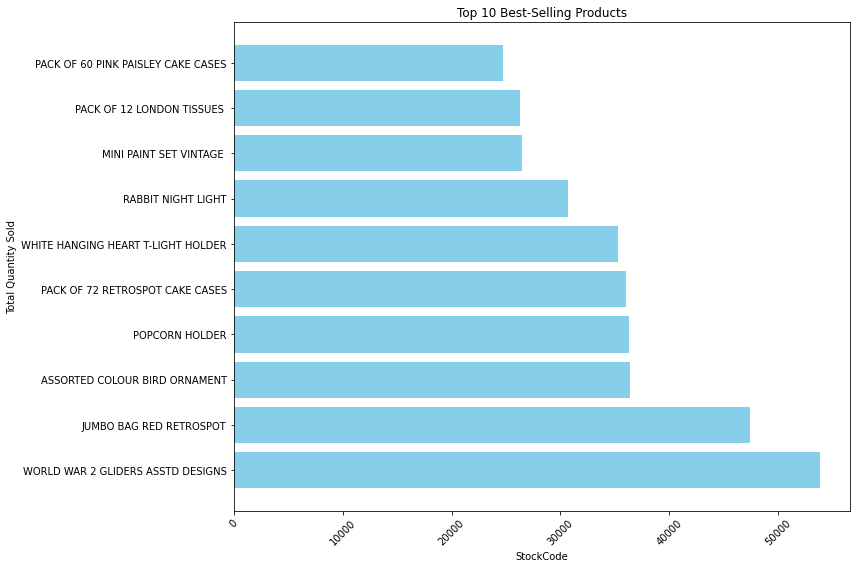

In [54]:

# Take top N best-selling products for visualization
top_n = 10  # You can change this value according to your preference
top_products = best_selling_products.head(top_n)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_products['Description'], top_products['Quantity'], color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.title('Top {} Best-Selling Products'.format(top_n))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Top purchased product is World War 2 Gliders ASSTD Designs.

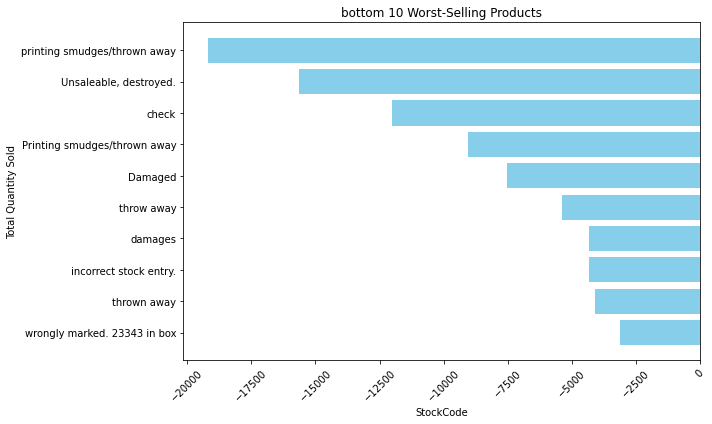

In [55]:
# Assuming you have already calculated best_selling_products DataFrame
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort products based on total quantity sold in descending order
worst_selling_products = product_sales.sort_values(by='Quantity', ascending=False)
# Take top N best-selling products for visualization
bottom_n = 10  # You can change this value according to your preference
bottom_products = best_selling_products.tail(bottom_n)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(bottom_products['Description'], bottom_products['Quantity'], color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity Sold')
plt.title('bottom {} Worst-Selling Products'.format(bottom_n))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


printing smudge/thrown away has worst purchased history.

# Further possible insights

Optimize Marketing Efforts: By understanding customer segments' preferences and behaviors, retailers can tailor their marketing efforts more effectively. This includes personalized email campaigns, targeted advertising on social media platforms, and optimizing product recommendations on the website to appeal to each segment's unique needs and interests.

Improve Customer Experience: Identifying and understanding customer segments allows retailers to tailor the shopping experience to meet their preferences. This includes optimizing the website layout, streamlining the checkout process, and providing personalized product recommendations to enhance customer satisfaction and increase repeat purchases. The products that have negative quantity purchase, either the retailer should remove those products from marketing perspective and in the meantime should assured their good quality.

In [37]:


# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1) #latest date in the data set
rfm_data = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalExpenditure': 'sum'})

# Rename the columns
rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalExpenditure': 'MonetaryValue'}, inplace=True)

# Divide into segments
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm_data['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm_data['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm_data['MonetaryValue'], q=4, labels=m_labels)

rfm_data = rfm_data.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)

# Add a new column to combine RFM score, 111 is the lowest and 444 is the highest
rfm_data['RFM_Segment'] = rfm_data[['R','F','M']].apply(lambda x: ''.join(x.map(str)), axis=1)
rfm_data['RFM_Score'] = rfm_data[['R','F','M']].sum(axis=1)

print(rfm_data)


            Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score
CustomerID                                                                   
12346           326          2           0.00  1  1  1         111          3
12347             2        182        4310.00  4  4  4         444         12
12348            75         31        1797.24  2  2  4         224          8
12349            19         73        1757.55  4  3  4         434         11
12350           310         17         334.40  1  2  2         122          5
...             ...        ...            ... .. .. ..         ...        ...
125816            1          2           3.35  4  1  1         411          6
125820            1        635        6637.59  4  4  4         444         12
125868            1        731        7689.23  4  4  4         444         12
125873            1         59        3217.20  4  3  4         434         11
125874            1        218        5664.89  4  4  4         4

A customer with an RFM score of 444 is a customer who has made a purchase very recently, makes purchases frequently, and spends a lot when they make purchases. These customers are often considered the most valuable customers to the business. They are the ones you’d probably want to focus most of your marketing efforts on. They could be offered special deals, loyalty programs, or other incentives to keep them engaged and encourage them to continue making purchases.


So, a customer with an RFM score of 111 is a customer who hasn’t made a purchase in a long time, rarely makes purchases, and spends very little when they do make purchases. These customers are often considered the least valuable customers to the business. They might require more marketing efforts to re-engage them, such as targeted promotions or special offers. It’s also possible that these customers have stopped doing business with you altogether. It’s important to investigate why these customers have low RFM scores and address any issues that might be causing them to disengage.

In [38]:
#'rfm_data' DataFrame to evaluate the RFM model

# Step 1: Assess Segment Characteristics

# Analyze the characteristics of each RFM segment
rfm_segments = rfm_data['RFM_Segment'].unique()
for segment in rfm_segments:
    segment_data = rfm_data[rfm_data['RFM_Segment'] == segment]
    print(f"RFM Segment: {segment}")
    print(segment_data.describe())  # Descriptive statistics for each segment
    print()

# Step 2: Evaluate Business Impact (if possible)

# Calculate total sales revenue for each segment
sales_revenue = rfm_data.groupby('RFM_Segment')['MonetaryValue'].sum()
print("Sales Revenue by RFM Segment:")
print(sales_revenue)

# Step 3: Analyze Predictive Power (if applicable)

# Calculate repeat purchase rate for each segment
repeat_purchase_rate = rfm_data.groupby('RFM_Segment')['Frequency'].apply(lambda x: (x > 1).mean())
print("Repeat Purchase Rate by RFM Segment:")
print(repeat_purchase_rate)


RFM Segment: 111
          Recency   Frequency  MonetaryValue  RFM_Score
count  517.000000  517.000000     517.000000      517.0
mean   290.164410    1.810445    -271.297408        3.0
std     53.708029    1.347855    1628.761909        0.0
min    204.000000    1.000000  -16888.020000        3.0
25%    247.000000    1.000000       0.000000        3.0
50%    282.000000    1.000000       1.950000        3.0
75%    339.000000    2.000000      14.150000        3.0
max    374.000000    6.000000     110.950000        3.0

RFM Segment: 444
          Recency    Frequency  MonetaryValue  RFM_Score
count  629.000000   629.000000     629.000000      629.0
mean     8.705882   344.866455    7614.932703       12.0
std      6.559938   535.646337   19692.738099        0.0
min      1.000000    93.000000    1414.990000       12.0
25%      3.000000   142.000000    2385.000000       12.0
50%      8.000000   222.000000    3770.600000       12.0
75%     13.000000   380.000000    6204.460000       12.0
max  

         Recency  Frequency  MonetaryValue  RFM_Score
count  28.000000  28.000000      28.000000       28.0
mean   44.857143   4.607143     262.813214        6.0
std    13.346422   1.911743     128.669735        0.0
min    24.000000   1.000000     112.460000        6.0
25%    33.000000   3.750000     147.330000        6.0
50%    48.000000   6.000000     227.815000        6.0
75%    52.250000   6.000000     409.025000        6.0
max    71.000000   6.000000     468.400000        6.0

RFM Segment: 234
          Recency  Frequency  MonetaryValue  RFM_Score
count   74.000000  74.000000      74.000000       74.0
mean   113.756757  67.743243    2631.600135        9.0
std     33.351105  15.902150    1515.464725        0.0
min     73.000000  35.000000    1421.430000        9.0
25%     85.500000  56.000000    1707.757500        9.0
50%    107.500000  72.000000    2136.765000        9.0
75%    140.250000  81.750000    2973.590000        9.0
max    192.000000  90.000000    9861.380000        9.0



RFM Segment: 212
          Recency  Frequency  MonetaryValue  RFM_Score
count   49.000000  49.000000      49.000000       49.0
mean   138.122449   3.285714     224.504286        5.0
std     41.095231   1.968502      93.615830        0.0
min     74.000000   1.000000     112.350000        5.0
25%    106.000000   1.000000     147.120000        5.0
50%    138.000000   3.000000     200.720000        5.0
75%    174.000000   5.000000     304.560000        5.0
max    201.000000   6.000000     451.420000        5.0

RFM Segment: 214
          Recency  Frequency  MonetaryValue  RFM_Score
count   12.000000  12.000000      12.000000       12.0
mean   120.666667   2.583333    3004.933333        7.0
std     38.950629   2.065224    2681.473646        0.0
min     75.000000   1.000000    1432.000000        7.0
25%     84.000000   1.000000    1642.935000        7.0
50%    115.000000   1.500000    1947.550000        7.0
75%    144.250000   4.250000    3105.280000        7.0
max    197.000000   6.000000  

max    191.000000  38.000000     110.640000        6.0

Sales Revenue by RFM Segment:
RFM_Segment
111   -1.402608e+05
112    1.201207e+04
113    8.222840e+03
114    2.232869e+04
121    2.539500e+03
122    9.464153e+04
123    3.883316e+04
124    2.663915e+04
131    1.991800e+02
132    3.224850e+04
133    1.437135e+05
134    7.665356e+04
142    7.248100e+02
143    7.135991e+04
144    4.881359e+05
211   -9.673658e+04
212    1.100071e+04
213    1.436159e+04
214    3.605920e+04
221    3.130020e+03
222    8.665561e+04
223    7.730905e+04
224    5.540546e+04
231   -6.405000e+02
232    2.880246e+04
233    2.048311e+05
234    1.947384e+05
242    2.359020e+03
243    6.622277e+04
244    4.682443e+05
311   -3.086647e+04
312    7.358770e+03
313    5.217660e+03
314    9.291870e+03
321    9.099000e+02
322    7.424932e+04
323    6.424704e+04
324    3.973991e+04
331    9.797000e+01
332    2.946635e+04
333    2.185277e+05
334    2.086002e+05
341    3.552714e-15
342    5.868980e+03
343    8.853255e+04
34

These descriptive statistics provide valuable insights into different RFM segments. Here are some observations and potential insights:

RFM Segment 111: This segment has a mean Recency of 290.16 days, indicating that these customers haven't made a purchase recently. The mean MonetaryValue is negative (-$271.30), which is unusual and might indicate refunds or returns. The low Frequency (mean of 1.81) suggests infrequent purchases.

RFM Segment 444: These customers have a very low Recency (mean of 8.71 days), indicating recent purchases. They also have a high Frequency (mean of 344.87) and high MonetaryValue (mean of $7614.93), suggesting they are highly engaged and valuable customers.

RFM Segment 224: This segment has a moderate Recency (mean of 125.25 days), Frequency (mean of 19.70), and MonetaryValue (mean of $2770.27), indicating moderately engaged customers who spend decently but not as much as the highest segment.

RFM Segment 434: While the Recency (mean of 9.99 days) is similar to segment 444, the Frequency (mean of 68.47) and MonetaryValue (mean of $3879.35) are lower. These customers might be regular buyers but with smaller transactions compared to segment 444.

RFM Segment 122: These customers have a higher Recency (mean of 283.94 days) and lower Frequency (mean of 16.55) and MonetaryValue (mean of $257.88) compared to the higher segments, indicating less engagement and lower spending.

Insights can vary based on business context and goals. For instance, segment 111 might need re-engagement strategies, while segment 444 might be targeted for loyalty programs. Segment 224 might benefit from personalized product recommendations, and segment 122 might need incentives to increase their spending.


# From the Repeat Purchase Rate by RFM Segment data:

High Repeat Purchase Rate: Segments with RFM scores like 121, 122, 123, 124, 131, 132, 133, and 134 have a repeat purchase rate of 100%. This indicates that customers in these segments are highly likely to make repeat purchases.

Variable Repeat Purchase Rate: Some segments have a mix of repeat and non-repeat purchasers. For example, segments like 111, 112, and 113 have a lower repeat purchase rate compared to others. This suggests that while some customers in these segments are loyal and make repeat purchases, others may not exhibit the same behavior.

Lower Repeat Purchase Rate: Segments with RFM scores like 411 and 412 have a relatively lower repeat purchase rate, indicating that customers in these segments are less likely to make repeat purchases. This could imply a need for targeted retention strategies or improvements in customer experience to encourage repeat purchases.

In [39]:
rfm_data[rfm_data['RFM_Segment'] == '111']

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,2,0.00,1,1,1,111,3
12353,204,4,89.00,1,1,1,111,3
12401,303,5,84.30,1,1,1,111,3
12503,338,1,-1126.00,1,1,1,111,3
12505,301,1,-4.50,1,1,1,111,3
...,...,...,...,...,...,...,...,...
109933,205,1,0.00,1,1,1,111,3
110000,204,1,3.95,1,1,1,111,3
110005,204,3,-5.92,1,1,1,111,3


In [40]:
# Assuming rfm_data is your DataFrame after RFM segmentation
customer_ids = rfm_data[rfm_data['RFM_Segment']=='111'].index

# Filter the original DataFrame
filtered_df = df[df['CustomerID'].isin(customer_ids)]
filtered_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
252,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,9.95,13747,United Kingdom,79.60
2018,536555,20697,LITTLE GREEN MONSTER SOFT TOY,1,2010-12-01 14:37:00,2.55,100100,United Kingdom,2.55
2019,536555,22716,CARD CIRCUS PARADE,1,2010-12-01 14:37:00,0.42,100100,United Kingdom,0.42
2093,536558,22802,FAUX FUR CHOCOLATE THROW,5,2010-12-01 14:48:00,19.95,100103,United Kingdom,99.75
2160,536565,21372,MIRRORED WALL ART TABLE LAMP,1,2010-12-01 15:15:00,2.95,100110,United Kingdom,2.95
...,...,...,...,...,...,...,...,...,...
196587,553900,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2011-05-19 17:47:00,9.95,12353,Bahrain,19.90
196588,553900,37446,MINI CAKE STAND WITH HANGING CAKES,8,2011-05-19 17:47:00,1.45,12353,Bahrain,11.60
196589,553900,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,4,2011-05-19 17:47:00,9.95,12353,Bahrain,39.80
196590,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19 17:47:00,2.95,12353,Bahrain,17.70


In [41]:
customer_ids

Int64Index([ 12346,  12353,  12401,  12503,  12505,  12605,  12665,  12666,
             12734,  12821,
            ...
            109776, 109802, 109804, 109819, 109929, 109933, 110000, 110005,
            110014, 110016],
           dtype='int64', name='CustomerID', length=517)

In [42]:
filtered_df['TotalExpenditure'].max()

77183.6

In [43]:
filtered_df['TotalExpenditure'].min()

-77183.6

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming filtered_df is your DataFrame
# Select numerical columns only
numerical_cols = filtered_df.select_dtypes(include=[np.number]).columns
data = filtered_df[numerical_cols]

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Create a KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the KMeans object to the data
kmeans.fit(data_normalized)

# Get the cluster assignments
clusters = kmeans.predict(data_normalized)

# Add the cluster assignments to the original DataFrame
filtered_df['Cluster'] = clusters


C:\Users\divya\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-44-1ad4534d9418>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = clusters


In [45]:
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure,Cluster
252,536393,22180,RETROSPOT LAMP,8,2010-12-01 10:37:00,9.95,13747,United Kingdom,79.60,2
2018,536555,20697,LITTLE GREEN MONSTER SOFT TOY,1,2010-12-01 14:37:00,2.55,100100,United Kingdom,2.55,0
2019,536555,22716,CARD CIRCUS PARADE,1,2010-12-01 14:37:00,0.42,100100,United Kingdom,0.42,0
2093,536558,22802,FAUX FUR CHOCOLATE THROW,5,2010-12-01 14:48:00,19.95,100103,United Kingdom,99.75,0
2160,536565,21372,MIRRORED WALL ART TABLE LAMP,1,2010-12-01 15:15:00,2.95,100110,United Kingdom,2.95,0
...,...,...,...,...,...,...,...,...,...,...
196587,553900,37449,CERAMIC CAKE STAND + HANGING CAKES,2,2011-05-19 17:47:00,9.95,12353,Bahrain,19.90,2
196588,553900,37446,MINI CAKE STAND WITH HANGING CAKES,8,2011-05-19 17:47:00,1.45,12353,Bahrain,11.60,2
196589,553900,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,4,2011-05-19 17:47:00,9.95,12353,Bahrain,39.80,2
196590,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19 17:47:00,2.95,12353,Bahrain,17.70,2


In [46]:
cluster_descriptions_111 = filtered_df.groupby('Cluster')['Description'].apply(lambda x: ', '.join(x.unique())).reset_index()
# Display the cluster descriptions
print(cluster_descriptions_111)

   Cluster                                        Description
0        0  LITTLE GREEN MONSTER SOFT TOY, CARD CIRCUS PAR...
1        1                     MEDIUM CERAMIC TOP STORAGE JAR
2        2  RETROSPOT LAMP, SOAP DISH BROCANTE, JAM JAR WI...
3        3                     MEDIUM CERAMIC TOP STORAGE JAR
4        4                                         AMAZON FEE


# Insights

Cluster 0: Customers in this cluster tend to purchase items such as CHILLI LIGHTS, DOORMAT TOPIARY, and DOORMAT 3 SMILEY CATS. These items suggest an interest in decorative items for the home, particularly those with playful or novelty designs.

Cluster 1: This cluster consists of customers who purchase items like BLACK CANDELABRA T-LIGHT HOLDER and AIRLINE BAG VINTAGE JET SET WHITE. These items indicate a preference for decorative and vintage-style products, possibly for home decor or gifting purposes.

Cluster 2: Customers in this cluster purchase items such as SET/10 RED POLKADOT PARTY CANDLES and SET/10 PINK POLKADOT PARTY CANDLES. These items suggest an interest in party supplies and decorations, particularly those with colorful and playful designs, possibly for special occasions or events.

Cluster 3: This cluster includes customers who purchase items like COLOUR GLASS T-LIGHT HOLDER HANGING and WHITE METAL LANTERN. These items suggest an interest in decorative lighting and lanterns, possibly for events or home decor, indicating a preference for ambiance-enhancing products.

These insights provide valuable information about the purchasing behavior and preferences of customers in each cluster. Retailers can use this information to tailor marketing strategies, product recommendations, and inventory management to better meet the needs and preferences of each customer segment.

In [47]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(data_normalized, clusters)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.9135124046132868


Higher silhouette score indicates better clustering.

In [48]:
# Assuming rfm_data is your DataFrame after RFM segmentation
customer_ids_444 = rfm_data[rfm_data['RFM_Segment']=='444'].index

# Filter the original DataFrame
filtered_df_444 = df[df['CustomerID'].isin(customer_ids_444)]
filtered_df_444

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.6
...,...,...,...,...,...,...,...,...,...
540435,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.4
540436,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.6
540437,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.0
540438,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.8


In [49]:
numerical_cols_444 = filtered_df_444.select_dtypes(include=[np.number]).columns
data_444 = filtered_df_444[numerical_cols_444]

# Normalize the data
scaler = StandardScaler()
data_normalized_444 = scaler.fit_transform(data_444)

# Create a KMeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the KMeans object to the data
kmeans.fit(data_normalized_444)

# Get the cluster assignments
clusters_444 = kmeans.predict(data_normalized_444)

# Add the cluster assignments to the original DataFrame
filtered_df_444['Cluster'] = clusters_444

C:\Users\divya\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-7178e949491e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_444['Cluster'] = clusters_444


In [50]:
filtered_df_444

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure,Cluster
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.0,1
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.0,1
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.0,1
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,10.2,1
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.6,1
...,...,...,...,...,...,...,...,...,...,...
540435,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.4,1
540436,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.6,1
540437,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.0,1
540438,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.8,1


In [57]:
cluster_descriptions_444 = filtered_df_444.groupby('Cluster')['Description'].apply(lambda x: ', '.join(x.unique())).reset_index()
# Display the cluster descriptions
print(cluster_descriptions_444)

   Cluster                                        Description
0        0  PACK OF 72 RETROSPOT CAKE CASES, HANGING HEART...
1        1  ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIK...
2        2  ROTATING SILVER ANGELS T-LIGHT HLDR, 60 TEATIM...
3        3            Manual, DOTCOM POSTAGE, CRUK Commission
4        4  BLACK RECORD COVER FRAME, RED WOOLLY HOTTIE WH...


In [58]:
silhouette = silhouette_score(data_normalized_444, clusters_444)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.8725299203803561


Decent Sihouette score. Reasonable level of clustering.

# Insights

Cluster 0: Customers in this cluster tend to purchase items like PACK OF 72 RETROSPOT CAKE CASES and HANGING HEART JAR T-LIGHT HOLDER. These items suggest an interest in baking supplies and decorative items for the home.

Cluster 1: This cluster consists of customers who purchase items such as ALARM CLOCK BAKELIKE PINK and ALARM CLOCK BAKELIKE GREEN. These items indicate a preference for vintage-style alarm clocks, possibly for decorative purposes.

Cluster 2: Customers in this cluster purchase items like ROTATING SILVER ANGELS T-LIGHT HLDR and 60 TEATIME FAIRY CAKE CASES. These items suggest an interest in decorative items for special occasions, such as tea parties or celebrations.

Cluster 3: This cluster includes customers who purchase items like Manual, DOTCOM POSTAGE, and CRUK Commission. The presence of these items suggests a mix of non-product-related transactions, such as manual adjustments, postage charges, and commission fees.

Cluster 4: Customers in this cluster purchase items like BLACK RECORD COVER FRAME and RED WOOLLY HOTTIE WHITE HEART. These items indicate an interest in decorative frames and cozy home accessories.

These insights provide valuable information about the purchasing behavior and preferences of customers in each cluster. Retailers can leverage this information to tailor marketing strategies, product recommendations, and inventory management to better serve the needs of each customer segment.

In [56]:
# Group transactions by CustomerID
transactions_by_customer = df.groupby('CustomerID')['Description'].apply(list)

# Create an empty dictionary to store the count of each item
item_counts = {}

# Iterate over each customer's transactions
for customer_transactions in transactions_by_customer:
    # Count the frequency of each item in the customer's transactions
    for item in set(customer_transactions):  # Use set() to remove duplicate items
        item_counts[item] = item_counts.get(item, 0) + 1

# Filter items that are repeatedly purchased (occur more than once)
repeated_items = {item: count for item, count in item_counts.items() if count > 1}

# Sort the repeated items by their count in descending order
repeated_items_sorted = sorted(repeated_items.items(), key=lambda x: x[1], reverse=True)

# Display the repeated items
for item, count in repeated_items_sorted:
    print(f"Item: {item}, Repeated Purchases: {count}")


Item: REGENCY CAKESTAND 3 TIER, Repeated Purchases: 1172
Item: WHITE HANGING HEART T-LIGHT HOLDER, Repeated Purchases: 1147
Item: JUMBO BAG RED RETROSPOT, Repeated Purchases: 1128
Item: PARTY BUNTING, Repeated Purchases: 1015
Item: PACK OF 72 RETROSPOT CAKE CASES, Repeated Purchases: 929
Item: SET OF 3 CAKE TINS PANTRY DESIGN , Repeated Purchases: 880
Item: NATURAL SLATE HEART CHALKBOARD , Repeated Purchases: 872
Item: JAM MAKING SET PRINTED, Repeated Purchases: 832
Item: JAM MAKING SET WITH JARS, Repeated Purchases: 829
Item: HEART OF WICKER SMALL, Repeated Purchases: 813
Item: LUNCH BAG RED RETROSPOT, Repeated Purchases: 810
Item: PAPER CHAIN KIT 50'S CHRISTMAS , Repeated Purchases: 795
Item: RECIPE BOX PANTRY YELLOW DESIGN, Repeated Purchases: 762
Item: JUMBO SHOPPER VINTAGE RED PAISLEY, Repeated Purchases: 761
Item: ASSORTED COLOUR BIRD ORNAMENT, Repeated Purchases: 761
Item: JUMBO STORAGE BAG SUKI, Repeated Purchases: 744
Item: JUMBO BAG PINK POLKADOT, Repeated Purchases: 719
Item

Item: TRIANGULAR POUFFE VINTAGE , Repeated Purchases: 31
Item: RED SHARK HELICOPTER, Repeated Purchases: 31
Item: 4 PINK DINNER CANDLE SILVER FLOCK, Repeated Purchases: 31
Item: CINAMMON & ORANGE WREATH, Repeated Purchases: 31
Item: GREEN JUICY FRUIT PHOTO FRAME, Repeated Purchases: 31
Item: TROPICAL LUGGAGE TAG, Repeated Purchases: 31
Item: ASSORTED CIRCULAR MOBILE, Repeated Purchases: 31
Item: MEDIUM PARLOUR PICTURE FRAME , Repeated Purchases: 31
Item: HEART SHAPE WIRELESS DOORBELL, Repeated Purchases: 31
Item: VINTAGE SHELLS PRINT, Repeated Purchases: 31
Item: LETTER "C" BLING KEY RING, Repeated Purchases: 31
Item: VIPPASSPORT COVER , Repeated Purchases: 31
Item: WALL ART ANIMALS AND NATURE , Repeated Purchases: 31
Item: BLUE POLKADOT PURSE , Repeated Purchases: 31
Item: TURQ STONE/CRYSTAL EARRINGS, Repeated Purchases: 31
Item: BLACK VINTAGE EARRINGS, Repeated Purchases: 31
Item: SUMMER BUTTERFLIES BAG CHARM, Repeated Purchases: 31
Item: PANTRY HOOK TEA STRAINER , Repeated Purchases

In [57]:
# Calculate net quantity for each product for each customer
df['NetQuantity'] = df.groupby(['CustomerID', 'StockCode'])['Quantity'].transform('sum')

# Filter out single purchases
df_repeat_purchases = df[df['NetQuantity'] > 1]

# Identify repeat customers
repeat_customers = df_repeat_purchases['CustomerID'].unique()

print(f"Number of repeat customers: {len(repeat_customers)}")

Number of repeat customers: 5620


In [58]:
# Assuming df is your DataFrame and repeat_customers is your list of repeat customer IDs
repeat_customers_df = df[df['CustomerID'].isin(repeat_customers)]

# Print the DataFrame
repeat_customers_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure,NetQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,122
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,122
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,108
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,110
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,104
...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,8
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,4


In [59]:
# Group by 'StockCode' and 'Description' instead of just 'StockCode'
df['NetQuantity'] = df.groupby(['CustomerID', 'StockCode', 'Description'])['Quantity'].transform('sum')

# Filter df to include only repeat purchases
df_repeat_purchases = df[df['NetQuantity'] > 1]

# Count the number of repeat purchases for each product
product_counts = df_repeat_purchases.groupby(['StockCode', 'Description']).size()

# Print the products that are repeatedly purchased
print(product_counts)


StockCode     Description                        
10002         INFLATABLE POLITICAL GLOBE               52
10080         GROOVY CACTUS INFLATABLE                 20
              check                                     1
10120         DOGGY RUBBER                             24
10123C        HEARTS WRAPPING TAPE                      1
                                                     ... 
M             Manual                                  181
POST          POSTAGE                                1067
gift_0001_10  Dotcomgiftshop Gift Voucher £10.00        1
gift_0001_20  Dotcomgiftshop Gift Voucher £20.00        1
              to push order througha s stock was        1
Length: 4079, dtype: int64


In [60]:
# Sort product_counts in descending order
sorted_product_counts = product_counts.sort_values(ascending=False)

# Print the sorted product counts
print(sorted_product_counts)


StockCode     Description                        
85123A        WHITE HANGING HEART T-LIGHT HOLDER     2177
85099B        JUMBO BAG RED RETROSPOT                1951
22423         REGENCY CAKESTAND 3 TIER               1825
47566         PARTY BUNTING                          1579
84879         ASSORTED COLOUR BIRD ORNAMENT          1488
                                                     ... 
22351         DOTCOMGIFTSHOP TEA TOWEL                  1
22275         WEEKEND BAG VINTAGE ROSE PAISLEY          1
23579         Sale error                                1
22246         GARLAND, MAGIC GARDEN 1.8M                1
gift_0001_20  to push order througha s stock was        1
Length: 4079, dtype: int64


WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT, REGENCY CAKESTAND 3 TIER, PARTY BUNTING are really good products as they show high number of repeated purchases.